In [66]:
import pandas as pd
from pandasql import sqldf

In [73]:
name = "10 HJ vs BB 3Bet"
dfs = []
for i in range(460):
    try:
        dfs.append(pd.read_csv("../reports/{}/two-tone/{}.csv".format(name, str(i).zfill(3))).drop(["Unnamed: 0"], axis=1))
    except:
        pass
df = pd.concat(dfs, axis=0)

In [74]:
df.columns = ["_" + x for x in df.columns]

In [75]:
df.head()


,_flop,_board_type,_0b,_1b,_2b,_profit
0,"[14, 14, 13]",two-tone,1,1,1,-0.992188
1,"[14, 14, 13]",two-tone,2,2,2,0.036957
2,"[14, 14, 13]",two-tone,3,2,2,0.275860
3,"[14, 14, 13]",two-tone,4,3,2,2.117390
4,"[14, 14, 13]",two-tone,8,6,4,2.840198


Average Difference between 15 and 16

In [76]:
sqldf("""
select AVG(abs(_15_profit - _16_profit)/_15_profit), count(*) from
(select _flop, 
      max(CASE WHEN _0b = 15 THEN _profit ELSE 0 END) AS _15_profit,
      max(CASE WHEN _0b = 16 THEN _profit ELSE 0 END) AS _16_profit            
from df 
group by 1
) x
where _16_profit > 0
""", globals())

,AVG(abs(_15_profit - _16_profit)/_15_profit),count(*)
0,0.186709,303


In [77]:
sqldf("""
select AVG(abs(_1_profit - _2_profit)/_1_profit), count(*) from
(select _flop, 
      max(CASE WHEN _0b = 1 THEN _profit ELSE 0 END) AS _1_profit,
      max(CASE WHEN _0b = 2 THEN _profit ELSE 0 END) AS _2_profit            
from df 
group by 1
) x
where _2_profit > 0
""", globals())

,AVG(abs(_1_profit - _2_profit)/_1_profit),count(*)
0,0.638194,105


NameError: name 'show' is not defined

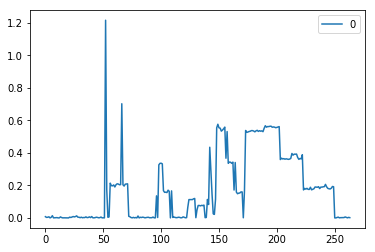

In [40]:
pd.DataFrame(sqldf("""
select abs(_15_profit - _16_profit) from
(select _flop, 
      max(CASE WHEN _0b = 15 THEN _profit ELSE 0 END) AS _15_profit,
      max(CASE WHEN _0b = 16 THEN _profit ELSE 0 END) AS _16_profit            
from df 
group by 1
) x
where _16_profit > 0
""", globals()).values).plot()
show()


In [14]:
df2 = sqldf("""select * from df a
        INNER JOIN (select flop, max(profit) AS max_profit from df group by 1) b on
        b.flop = a.flop and a.profit = b.max_profit
       order by 1 desc"""
      ,globals())
df2.to_csv("../reports/condensed_results/{}.csv".format(name))




In [5]:
df2.columns = ["_" + col for col in df2.columns]

In [6]:
sqldf("select _0b, _1b, _2b, count(*), max(_flop), min(_flop) from df2 group by 1,2,3 order by 4 desc" , globals())

,_0b,_1b,_2b,count(*),max(_flop),min(_flop)
0,1,1,1,229,"[9, 9, 5]","[10, 10, 6]"
1,2,2,2,46,"[9, 8, 7]","[11, 9, 7]"
2,1,0,0,37,"[9, 9, 4]","[10, 10, 2]"
3,1,0,1,24,"[8, 8, 5]","[12, 8, 2]"
4,1,1,2,14,"[9, 7, 4]","[10, 8, 4]"
5,1,2,1,12,"[12, 11, 4]","[10, 9, 2]"
6,8,6,4,8,"[14, 14, 13]","[14, 11, 11]"
7,16,10,6,8,"[9, 9, 7]","[10, 10, 8]"
8,3,2,2,7,"[14, 13, 9]","[12, 9, 9]"
9,8,6,3,6,"[14, 9, 9]","[12, 7, 7]"


In [7]:
df2[["_profit"]].plot()

/Users/petermyers/Desktop/Code/commons/venv/lib/python3.6/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x121362898> has a label of '_profit' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


In [8]:
df2.columns = ["_flop", "_board_type", "_0b", "_1b", "_2b", "profit", "temp", "temp2"]
df2.drop(["temp", "temp2"], axis=1, inplace=True)

In [9]:
df2["rank1"] = df2["_flop"].apply(lambda x: x.replace("[","").replace("]","").split(",")[0]).astype(int)
df2["rank2"] = df2["_flop"].apply(lambda x: x.replace("[","").replace("]","").split(",")[1]).astype(int)
df2["rank3"] = df2["_flop"].apply(lambda x: x.replace("[","").replace("]","").split(",")[2]).astype(int)

In [10]:
def val_difference_from_val(val1, val2):
    return val1 - val2

df2['range'] = df2[["rank1", "rank3"]].apply(lambda x: val_difference_from_val(*x), axis=1).astype(float)
df2['top_range'] = df2[["rank1", "rank2"]].apply(lambda x: val_difference_from_val(*x), axis=1).astype(float)
df2['bottom_range'] = df2[["rank2", "rank3"]].apply(lambda x: val_difference_from_val(*x), axis=1).astype(float)





In [11]:
df2.drop(["_flop"], axis=1, inplace=True)


In [12]:
df2.drop(["_board_type"], axis=1, inplace=True)


In [13]:
df2.drop(["profit"], axis=1, inplace=True)


In [14]:
df2["_0b"] = df2["_0b"].astype(str)
df2["_1b"] = df2["_1b"].astype(str)
df2["_2b"] = df2["_2b"].astype(str)
df2["_0b"] = df2["_0b"].apply(lambda x: x.zfill(2))
df2["_1b"] = df2["_1b"].apply(lambda x: x.zfill(2))
df2["_2b"] = df2["_2b"].apply(lambda x: x.zfill(2))

In [15]:
df2.head()

,_0b,_1b,_2b,rank1,rank2,rank3,range,top_range,bottom_range
0,16,11,10,9,9,8,1.0,0.0,1.0
1,16,10,06,9,9,7,2.0,0.0,2.0
2,16,11,08,9,9,6,3.0,0.0,3.0
3,01,01,01,9,9,5,4.0,0.0,4.0
4,01,00,00,9,9,4,5.0,0.0,5.0


max_depth 1 accuracy 0.7262443438914027
max_depth 2 accuracy 0.751131221719457
max_depth 3 accuracy 0.7895927601809954
max_depth 4 accuracy 0.8167420814479638
max_depth 5 accuracy 0.8642533936651584
max_depth 6 accuracy 0.9117647058823529
max_depth 7 accuracy 0.9524886877828054
max_depth 8 accuracy 0.9660633484162896
max_depth 9 accuracy 0.9819004524886877
max_depth 10 accuracy 0.9909502262443439
max_depth 11 accuracy 0.995475113122172


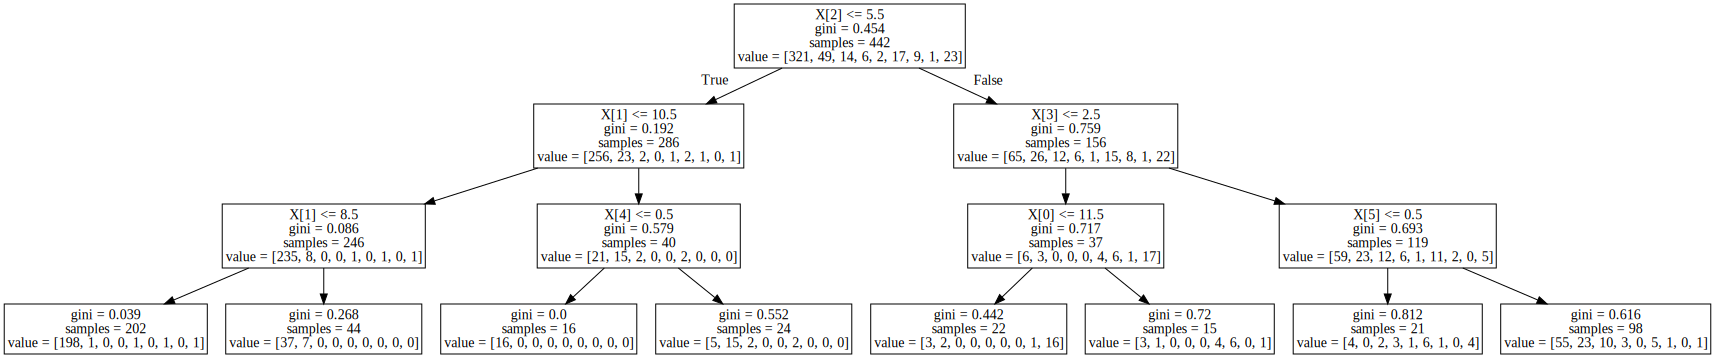

In [16]:

%matplotlib inline
import numpy as np
from sklearn import tree
from graphviz import Source
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz


focus = "_0b"
outputs = ["_0b", "_1b", "_2b"]
max_depth = 3

# X and y
X = df2.drop(outputs, axis=1).values
y = df2[focus].values

for i in range(1,12):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(X, y)
    pred = clf.predict(X)

    final_df = df2.copy()
    final_df['pred_{}'.format(focus)] = pred
    accuracy = accuracy_score(df2[focus].values, pred)
    print("max_depth", i, "accuracy", accuracy)

clf = tree.DecisionTreeClassifier(max_depth=max_depth)
clf = clf.fit(X, y)
pred = clf.predict(X)
# CSV if you want to review results
# final_df.to_csv("output/{}_predictions.csv".format(focus))

# Graph
dot_data = export_graphviz(clf, out_file=None)
graph = Source(dot_data)
graph.render("../reports/figures/CO_RFI_vs_BN_call_{}".format(focus))
graph



In [17]:
for i, j in zip(df2.drop(outputs, axis=1).columns, range(len(df2.drop(outputs, axis=1).columns))):
    print(j,i)

0 rank1
1 rank2
2 rank3
3 range
4 top_range
5 bottom_range


In [18]:
pd.DataFrame(df2[focus].value_counts()).reset_index().sort_values(by=["index"]).set_index(["index"])

,_0b
index,
01,321
02,49
03,14
04,6
05,2
08,17
10,9
13,1
16,23


In [25]:
sqldf("select _0b, _0b - _1b AS diff1, count(*) FROM df2 group by 1,2 order by 1, 3 desc", globals())

,_0b,diff1,count(*)
0,01,0,243
1,01,1,61
2,01,-1,17
3,02,0,46
4,02,-1,2
5,02,1,1
6,03,1,12
7,03,2,2
8,04,1,6
9,05,1,2


In [26]:
df

,flop,board_type,0b,1b,2b,profit
0,"[14, 14, 13]",two-tone,0,0,0,1.053372
1,"[14, 14, 13]",two-tone,1,1,1,1.684726
2,"[14, 14, 13]",two-tone,2,2,2,1.828984
3,"[14, 14, 13]",two-tone,3,2,2,2.109554
4,"[14, 14, 13]",two-tone,7,5,4,2.162975
5,"[14, 14, 13]",two-tone,8,6,4,2.471346
0,"[14, 14, 12]",two-tone,0,0,0,0.823880
1,"[14, 14, 12]",two-tone,1,1,1,1.513256
2,"[14, 14, 12]",two-tone,2,2,2,1.667185
3,"[14, 14, 12]",two-tone,3,2,2,1.959040


In [27]:
df2

,_0b,_1b,_2b,rank1,rank2,rank3,range,top_range,bottom_range
0,16,11,10,9,9,8,1.0,0.0,1.0
1,16,10,06,9,9,7,2.0,0.0,2.0
2,16,11,08,9,9,6,3.0,0.0,3.0
3,01,01,01,9,9,5,4.0,0.0,4.0
4,01,00,00,9,9,4,5.0,0.0,5.0
5,01,00,00,9,9,3,6.0,0.0,6.0
6,01,00,00,9,9,2,7.0,0.0,7.0
7,16,11,10,9,8,8,1.0,1.0,0.0
8,02,02,02,9,8,7,2.0,1.0,1.0
9,02,02,02,9,8,6,3.0,1.0,2.0


In [31]:
df2 = sqldf("""select * from df a
        INNER JOIN (select flop, max(profit) AS max_profit from df group by 1) b on
        b.flop = a.flop and a.profit = b.max_profit
       order by 1 desc"""
      ,globals())
df2.columns = ["_" + col for col in df2.columns]

In [35]:
df.columns = ['flop', 'board_type', '_0b', '_1b', '_2b', 'profit']

In [53]:
df3 = sqldf("""

select a.*, b.max_profit

from df a INNER JOIN (select _flop, _0b, max(_max_profit) AS max_profit from df2 GROUP BY 1,2) b on b._flop = a.flop and a._0b = b._0b
WHERE a._1b = 
        case when (a._0b*0.66) = cast((a._0b*0.66) as int) then cast((a._0b*0.66) as int)
             else 1 + cast((a._0b*0.66) as int)
        end and
      a._2b = 
        case when (a._1b*0.66) = cast((a._1b*0.66) as int) then cast((a._1b*0.66) as int)
             else 1 + cast((a._1b*0.66) as int)
        end        

"""
            
      ,globals())
df3

,flop,board_type,_0b,_1b,_2b,profit,max_profit
0,"[14, 14, 13]",two-tone,8,6,4,2.471346,2.471346
1,"[14, 14, 12]",two-tone,8,6,4,2.358888,2.358888
2,"[14, 14, 11]",two-tone,8,6,4,2.601731,2.601731
3,"[14, 14, 10]",two-tone,4,3,2,1.800702,1.800702
4,"[14, 14, 9]",two-tone,8,6,4,1.743618,1.870385
5,"[14, 14, 8]",two-tone,1,1,1,1.019059,1.125161
6,"[14, 14, 7]",two-tone,1,1,1,1.006479,1.090914
7,"[14, 14, 6]",two-tone,1,1,1,0.975103,1.059658
8,"[14, 14, 5]",two-tone,1,1,1,0.920215,1.006872
9,"[14, 14, 4]",two-tone,1,1,1,0.889555,0.986971


In [54]:
df3["diff"] = df3["max_profit"] - df3["profit"]

In [57]:
df3.sort_values(by=["diff"], ascending=False)

,flop,board_type,_0b,_1b,_2b,profit,max_profit,diff
355,"[9, 5, 5]",two-tone,16,11,8,0.901825,1.129895,0.228070
365,"[8, 8, 7]",two-tone,16,11,8,0.129368,0.323274,0.193906
233,"[11, 11, 9]",two-tone,13,9,6,2.294759,2.442092,0.147333
4,"[14, 14, 9]",two-tone,8,6,4,1.743618,1.870385,0.126766
371,"[8, 7, 7]",two-tone,16,11,8,0.479399,0.602660,0.123261
331,"[9, 9, 7]",two-tone,16,11,8,0.673093,0.794836,0.121743
249,"[11, 10, 2]",two-tone,1,1,1,2.212852,2.321536,0.108683
248,"[11, 10, 3]",two-tone,1,1,1,2.176126,2.284376,0.108251
5,"[14, 14, 8]",two-tone,1,1,1,1.019059,1.125161,0.106102
344,"[9, 7, 7]",two-tone,16,11,8,0.876234,0.980857,0.104623


In [60]:
df3["diff"].sum()

6.79741011448005

In [61]:
df3["profit"].sum()

477.92848955470095

CONCLUSION: DO NOT TUNE CAT3 1b, 2b !!! GREAT!.   Use instead the hard code of .66 ceiling (hopefully this applies to all preflop action situations.